# 데이터 전처리 (Preprocessing)

데이터를 전처리해야 하는 경우<br/>
- 문자로 되어있는 데이터를 숫자 타입으로 변환
- 값이 중간에 없는 경우 빼거나 평균 값으로 값을 채워넣거나 일괄적으로 데이터를 추가한다<br/>
데이터양이 충분하다면 지우는 것이 좋다.<br/><br/>
1. Data Proprocessing
2. Scaling
3. Sampling
4. Dimensionality Reduction
5. Categorial Variable to Numeric Variable

# 1. Data Preprocessing

- 데이터를 분석하기 용이하게 고치는 모든 작업
- 데이터 사이언스 전 과정에서 알고리즘을 수행하는 것 보다 더 많은 시간을 데이터 전처리 과정에서 소모함 (80~90%)
- 알고리즘이나 파라메터가 잘못된 경우에는 지속적인 실험으로 문제를 찾아 개선할 수 있지만<br/>
데이터 자체가 잘못된 경우에는 실험 결과가 개선되지 않음<br/><br/>

데이터의 경우 다음과 같음 문제점들이 있을 수 있음
- 결측치 : 중요한 데이터 누락
- 데이터 오류 : 잘못된 데이터의 입력
- 이상치 : 값의 범위가 일반적인 범위에서 벗어남
- 데이터 형식 : 분석하기 적합하지 않은 형식
- 범주형 데이터 : 범주형으로 표시되어야 하는데 다른 형태로 되어있음<br/>
숫자인 경우에 연산을 하려고 해서 흑백이 아닌 회색의 결과가 출력됨

# 2. Scaling
- 변수의 크기가 너무 크거나 너무 작은 경우 결과에 미치는 영향력이 일정하지 않을 수 있어서<br/>
변수의 크기를 일정하게 맞추는 작업을 <strong>Scaling</strong>이라고 함
- 우리가 배울 Scikit-learn의 대표적인 스케일링 함수<br/>
Min-Max 스케일링<br/>
z-정규화를 이용한 Standard 스케일링

## Min-Max Scaling
- Min-Max 스케일링을 하면 값의 범위가 0~1 사이로 변경됨<br/>
이렇게 하는 이유는 특정 값들이 전체에 미치는 영향을 줄여서 모든 값들이<br/>
단위 크기와 상관없이 중요한 영향력을 가질 수 있게 하기 위함
- 전체적인 수치를 '1' 기준으로 비율이 조정되어서 모든 Feature들이 같은 조건에서 학습될 수 있게 하는 기법

<img src="./images/0411_1.png" style="float:left">

- sklearn.preprocessing 패키지 안에 전처리와 관련된 기능들이 포함되어 있다.

from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()

mMscaler.fit(data)

mMscaled_data = mMscaler.transform(data)
mMscaled_data = pd.DataFrame(mMscaled_data, columns=data.columns)

## MinMaxScaling 실습

In [1]:
# 먼저 필요한 패키지를 가져온다.

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# 전복데이터를 사용하는 이유? 전복은 암, 수가 없는데 크다가 암, 수가 결정됨

abalone_columns = list()
for l in open('./data/abalone_attributes.txt') :
    l = l.strip()
    abalone_columns.append(l)

data = pd.read_csv('./data/abalone.txt', header=None, names=abalone_columns)

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
label = data['Sex']

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# 데이터 모양을 shape으로 알 수 있다.
data.shape

(4177, 9)

In [7]:
del data['Sex']

In [8]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [11]:
# Min-Max Scaling
# 간단한 수식이지만, 웬만큼 튀는 수치는 이걸로 잡을 수 있다.

data = (data - np.min(data)) / (np.max(data) - np.min(data))
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [12]:
# 패키지 안에 제공되는 Min-Max Scaling 사용

from sklearn.preprocessing import MinMaxScaler

In [13]:
mMscaler = MinMaxScaler()

In [14]:
# mMscaler.fit(data)

In [15]:
# fit은 데이터를 붙이는 작업만 하고,
# 실제로 변형할 때는 fit_transform에서 변형된다.
# fit과 transform 둘 다 실행이 되려면 fit_transform을 사용해야 한다.

mMscaled_data = mMscaler.fit_transform(data)

In [16]:
# pandas보다 numpy가 속도는 빠르다.
type(mMscaled_data) # numpy.ndarray
type(data) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

## Standard Scaling
- z-score라고 부르는데 데이터를 통계적으로 표준정규분포화 시켜 스케일링 하는 방식
- 데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 함<br/>
<img src="./images/0411_2.png" style="float:left" width=300px;>

## StandardScaler 실습

In [17]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [18]:
sdscaled_data = sdscaler.fit_transform(data)

In [19]:
sdscaled_data
# 데이터를 표준분포로 바꿨기 때문에 표준분포 위로는 + 값을 표준분포 아래로는 - 값을 가진다.
# -1부터 +1까지의 값 사이에 분포하게 만들었다.
# 대체로 MinMaxScaler를 주로 사용한다.

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

# 3. Sampling
- 샘플링 하는 이유는 클래스 불균형 문제를 해결하기 위함
- 클래스 불균형 문제란,<br/>
분류를 목적으로 하는 데이터 셋에 클래스 라벨의 비율이 균형적으로 맞지 않고<br/>
한쪽으로 치우치게 되어 각 클래스의 데이터를 학습하기 어려워지는 경우<br/><br/>

- 샘플링의 두가지 방법<br/>
적은 클래스의 수를 증가시키는 Oversampling<br/>
많은 클래스의 수를 감소시키는 Undersampling

## Random Over, Under Sampling
- 가장 쉽게 샘플링 하는 방법은 임의로 데이터를 선택, 복제, 제거하는 방식<br/>
복제하는 경우 생기는 문제점 : 데이터가 많아지면서 데이터 자체 과적합 될 수 있음<br/>
제거하는 경우 생기는 문제점 : 데이터셋이 가지고 있는 정보 자체의 손실이 생길 수 있음<br/><br/>

- 샘플링 알고리즘은 imblearn에서 제공

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=2019)
rus = RandomUnderSampler(random_state=2019)

데이터에서 특징을 학습함과 동시에 데이터 샘플링<br/><br/>

Over 샘플링<br/>
oversampled_data, oversampled_label = ros.fit_resample(data, label)<br/>
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)<br/><br/>

Under 샘플링<br/>
undersampled_data, undersampled_label = rus.fit_resample(data, label)<br/>
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))<br/>
print('\nRandom Over 샘플링 결과 \n{}'.format(pd.get_dummies(oversampled_label).sum()))<br/>
print('\nRandom Under 샘플링 결과 \n{}'.format(pd.get_dummies(undersampled_label).sum()))<br/>

## Random Over, Under Sampling 실습

!pip insatll imblearn<br/>
명령으로 imblearn 라이브러리를 설치한다

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=2019)
rus = RandomUnderSampler(random_state=2019)

In [21]:
data.shape

(4177, 8)

In [22]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [23]:
oversampled_data.shape # 샘플이 늘어난 것을 확인할 수 있다.

(4584, 8)

In [24]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.635135,0.613445,0.146018,0.315743,0.284129,0.288348,0.225710,0.250000
4580,0.574324,0.554622,0.106195,0.197627,0.189980,0.134957,0.133034,0.250000
4581,0.520270,0.521008,0.101770,0.180273,0.158373,0.154707,0.121076,0.214286
4582,0.594595,0.563025,0.097345,0.187356,0.161735,0.128374,0.159442,0.250000


In [25]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [26]:
undersampled_data.shape

(3921, 8)

여태까지는 oversampled와 undersampled가 임의로 증가하거나 줄어들거나 함.<br/><br/>

SMOTE (Synthetic Monority Oversampling Technique)<br/>
- 임의 Over, Under 샘플링은 데이터 중복으로 인한 과적합 문제나 데이터 손실의 문제가 있어 문제를 최대한 해결할 수 있는 방법으로 SMOTE 알고리즘이 제시<br/>
- SMOTE 알고리즘은 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성하는 방식
- SMOTE의 장점은 데이터 손실이 없고 과적합을 완화 시킬 수 있음<br/>

knn 최근접의 거리가 멀수록 스무스하게 나오고 거리가 가까울 수록 타이트하게 나온다.

In [27]:
from sklearn.datasets import make_classification
#classification을 할 수 있는 데이터를 생성해준다.

data, label = make_classification(
    n_samples = 1000, # 샘플의 총 갯수
    n_classes = 3, # 3개의 그룹
    n_features = 2,
    n_repeated = 0, # 반복
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class = 1, # 한 클래스 안에 하나의 클러스터가 들어간다. 명확한 데이터를 만들겠다.
    weights = [0.05, 0.15, 0.8], # 벡분율 기준으로 다 합치면 숫자 1이 되어야 한다.
    class_sep = 1, # 클래스가 얼마나 떨어져 있는지
    random_state = 2022 # 난수 발생 시드
)

class_sep : 클래스간 얼마나 떨어져있는지, 기본값은 1이며 값이 올라갈수록 클래스간 많이 떨어져있어 분류가 쉽다.<br/>
random_state : 재현가능하기위한 랜덤넘버<br/>
n_informative : 쓸모있는 피처가 몇개있는지. n_features보다는 적게 주어야 한다.<br/>
weights : 1이면 균형셋, 그렇지않으면 불균형 세트, 현재 3개라 (5%, 15%, 80%) 셋으로 만듬<br/>

### make_classification 함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령<br/>

- n_samples : 표본 데이터의 수, 디폴트 100
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_features : 독립 변수의 수, 디폴트 20
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드
- class_sep : 클래스 간 얼마나 떨어져 있는지, 기본 값은 1이며 값이 올라갈수록 클래스 간 많이 떨어져있어서 분류가 쉽다.

In [28]:
data.shape

(1000, 2)

In [29]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

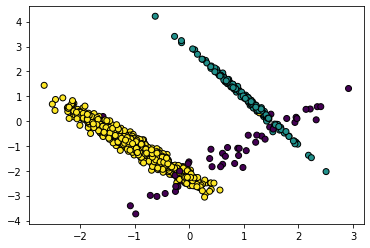

In [30]:
plt.scatter(data[:,0], data[:,1], c = label, linewidth=1, edgecolor="k")
# color를 label로 주면 클래스마다 색상이 다르게 나온다

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5) # 기본 5개를 기준으로 실행해본다.

### SMOTE (Sythetic Minority Over-Sampling Technique)
거의 모든 샘플링 기법이 이 SMOTE를 뿌리로 뻗어나갔다해도 과언이 아닐만큼 많이 쓰인 기법이다.<br/>
<strong>임의의 소수 클래스 데이터로부터 인근 소수 클래스 사이에 새로운 데이터를 생성하는 것</strong><br/><br/>
방법<br/>
- 먼저 임의의 소수 클래스에 해당하는 관측치 X를 잡는다.<br/>
- 그 X로부터 가장 가까운 K개의 이웃(nn : Nearest Neighbors)를 찾는다.<br/>
- K개의 X(nn)개와 X 사이에 임의의 새로운 데이터 X를 생성하는 것

In [32]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [33]:
data.shape

(1000, 2)

In [34]:
smoted_data.shape # 130% 가까이 데이터가 over sampling 됨

(2382, 2)

In [35]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
# 라벨을 기준으로 dummis (데이터) 를 털어내서 합계를 내서 출력 / 5%, 15%, 80% 비율의 값이 출력
print('\nRandom Over 샘플링 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))
# 제일 큰 숫자에 나머지가 다 맞춰졌다.
# knn 5개의 점 중에 제일 멀리있는 점 근처에 샘플링을 늘린 결과다.

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

Random Over 샘플링 결과 
0    794
1    794
2    794
dtype: int64


예를들어,<br/>
통계를 맞출 때 A그룹은 남자, B그룹은 여자, C그룹은 성소수자 일 때, <br/>
다수결로 결정한다면 남자의 의견을 들어야하는 상황이 온다.<br/>
남자 : 100, 여자 : 97, 성소수자 : 7 일 때 <br/>
비율로 통계를 낸다고 한다면 가장 많은 남자 그룹에 맞춰서 샘플의 갯수를 늘리는 방식이다.

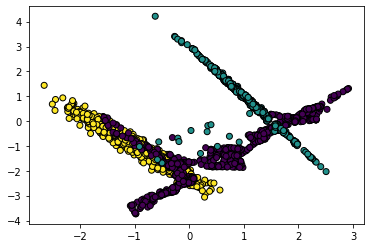

In [36]:
plt.scatter(smoted_data[:,0], smoted_data[:, 1], c=smoted_label, linewidth=1, edgecolors="k")

샘플의 갯수가 늘어난 것을 볼 수 있다.<br/>
데이터의 분포가 깔끔하지 않은이유? <br/>
원 데이터의 분포에서 떨어져있는 점이 있다.<br/>
작은 갯수 주변으로 샘플의 갯수가 늘어난 것이다.<br/>

샘플링할 때 가장 많이 사용되는 형태가 SMOTE 형태이다.

# 4. Dimensionality Reduction

차원의 저주는 저차원에서 일어나지 않았던 현상들이<br/>
고차원에서 데이터를 분석하거나 다룰 때 발생하는 현상<br/><br/>

차원의 저주가 발생하는 이유?<br/>
- 고차원으로 올라갈 수록 공간의 크기가 증가<br/>
- 공간의 크기가 증가할 경우, 데이터가 존재하지 않는 빈 공간이 생김<br/>이런 빈 공간들이 데이터를 해석할 때 문제를 일으킴<br/>
특성이 옅어지면 데이터 분석 시 힘듬

- 데이터의 차원이 불필요하게 큰 경우에는 필요없는 변수를 제거하고<br/>
과적합을 방지하기 위해서 데이터 차원을 축소함
- 과적합의 이유 말고도 높은 차원의 데이터는 사람이 해석하기에도<br/>
어려움이 있어서 차원을 축소하는 작업을 하기도 함

## 차원의 저주 실습

In [37]:
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [40]:
digits.data.shape

(1797, 64)

In [41]:
data = digits.data
label = digits.target

In [42]:
# data의 모양을 바꿔야한다.
img = data[0].reshape(8, 8) # 숫자가 높은 곳을 연결하면 0처럼 보인다.

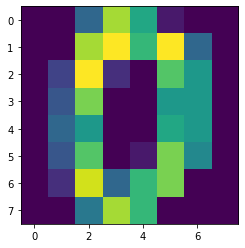

In [43]:
plt.imshow(img)
# matplotlib이 이미지를 만들어서 보여준다.

Label : 0


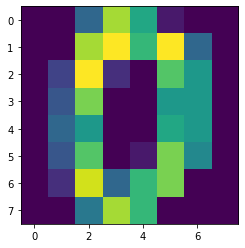

In [44]:
plt.imshow(data[0].reshape(8, 8))
print('Label : {}'.format(label[0]))

## 주 성분 분석 (Principal Component Analysis, PCA)

- 대표적인 차원 축소 기법으로 주 성분 분석(PCA)이 사용됨
- PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection해서 차원을 축소하는 방식
- 데이터를 가장 잘 표현하는 축이란 데이터의 분산을 잘 표현하는 축
- Principal Component(주성분)는 데이터 셋을 특이값 분해를 통해 얻어지는 고유한 벡터 값
- 고유한 벡터 값은 서로 직교하기 때문에 독립적으로 데이터를 잘 표현할 수 있음

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components 인자는 주 성분 갯수를 설정하는 인자

In [46]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [47]:
new_data = pca.fit_transform(data)
new_data

array([[ -1.25946618,  21.27488247],
       [  7.95761143, -20.76869542],
       [  6.99192264,  -9.95598792],
       ...,
       [ 10.80128358,  -6.9602531 ],
       [ -4.87209852,  12.42393569],
       [ -0.34438981,   6.36554546]])

In [48]:
data.shape

(1797, 64)

In [49]:
new_data.shape # 축소한 차원 data의 shape 확인 (64에서 2로 훅 떨어진 게 보인다.)

(1797, 2)

In [50]:
new_data  

array([[ -1.25946618,  21.27488247],
       [  7.95761143, -20.76869542],
       [  6.99192264,  -9.95598792],
       ...,
       [ 10.80128358,  -6.9602531 ],
       [ -4.87209852,  12.42393569],
       [ -0.34438981,   6.36554546]])

In [51]:
new_data[0]

array([-1.25946618, 21.27488247])

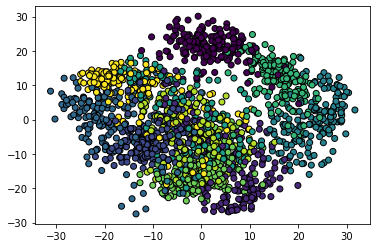

In [52]:
# x, y 좌표계로 그림그리면 어디쯤 위치하고 있는지 확인할 수 있다.
plt.scatter(new_data[:, 0], new_data[:, 1], c=label, linewidth=1, edgecolors="k")

어느정도 군집을 이루고 있는 것을 확인할 수 있다. <br/>
높은 확률로 데이터를 구별하여 학습을 시킬 수 있는 상황이 되었다고 볼 수 있다.

# 5. Categorical Variable to Numeric Variable
- 범주형 데이터란 차의 등급을 나타내는 소형, 중형, 대형처럼 범주로 분류될 수 있는 변수를 의미 <br/>
- 범주형 데이터는 주로 데이터 상에서 문자열로 표현되는데 문자와 숫자가 매핑 되는 형태로 표현되기도 한다 <br/>
- 컴퓨터가 data를 활용하여 모델화하고 학습하기 위해서는 data를 모두 수치화 해야 한다.
- 수치화 방법 : Label Encoding, One-hot Encoding

## Label Encoding
- Label Encoding은 n개의 범주형 데이터를 0 ~ n-1의 연속적인 수치 데이터로 표현
- Label Encoding은 간단한 방법이지만 문제를 단순화 시킬 수 있다

from sklearn.preprocessing import LabelEncoder<br/>
le = LabelEncoder()<br/>

le.fit(label) <br/>

label_encoded = le.transform(label)

## One-hot Encoding
- One-hot encoding은 n개의 범주형 데이터를 n개의 비트 벡터로 표현함<br/>
= 차원이 n개만큼 있어야한다.
- 종류의 수만큼 차원이 확장됨
- One-hot encoding은 서로 다른 범주에 대해 벡터 내적을 취했을 때, 내적이 0이 나게 되면서 서로 다른 범주는 독립적이라는 것을 표현하게 함
- 장점 : 숫자가 겹치지 않아서 명확하게 차원을 가지고 구별할 수 있다
- 단점 : 범주형 데이터가 많아지면 쓸데없는 데이터가 많아진다는 게 단점이다. 너무 많은 범주형 데이터에 대해서는 사용하지 않는다.

from sklearn.preprocessing import OneHotEncoder<br/>
ohe = OneHotEncoder(sparse=False)

ohe.fit(label.valeus.reshape((-1, 1)))

one_hot_encoded = ohe.transform(label.values.reshape((-1, 1)))

In [53]:
data = pd.read_csv('./data/abalone.txt', header=None, names=abalone_columns)

In [54]:
label = data['Sex']

In [55]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
label_encoded_label = le.fit_transform(label)
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [64]:
label_encoded_label.reshape(-1, 1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [70]:
label.values.reshape((-1, 1))

array([['M'],
       ['M'],
       ['F'],
       ...,
       ['M'],
       ['F'],
       ['M']], dtype=object)

In [67]:
# label_encoded_data를 보기좋게 출력하는 부분
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1, 1)), label_encoded_label.reshape((-1, 1))], axis=1), columns=['label', 'label_encoded'])
# np.concatenate : 배열 두개를 합쳐주는 역할
# index, label 과 label_encoded 배열을 합쳤다.

In [60]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


# One-Hot Encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

sparse는 default가 True이다. default 값은 Matrix이다. <br/>
False로 하면 Array로 반환된다.<br/>
원 핫 인코딩을 할 때는 True보다 False를 놓고 쓰면서 출력되는 배열을 받아서 쓴다.

In [72]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

label만 넣었을 때 에러가 떴다.
<img src="./images/0411_3.png" style="float:left">
<br/><br/><br/><br/>

에러를 잘 보면 <strong>using array.reshape(-1, 1)</strong>로 수정하라고 나온다.

In [73]:
print(one_hot_encoded)
# 차원이 겹치지 않고 원 핫 인코딩이 된 것을 볼 수 있다.
# 원 핫 인코딩된 데이터로 학습을 시키면 더 잘 분석할 수 있다.

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


# 학습 정리
- 전체 머신러닝 Process에서 데이터를 가공하고 준비하는 과정이 전체의 80~90%를 차지할 정도로 데이터 전처리가 중요하다<br/>
- Feature들의 크기를 맞추는 Scaling, 클래스의 불균형을 맞추기 위한 Sampling,<br/>
그리고 다차원 오류를 예방하기 위해 사용되는 Dimensionality Reduction 등 다양한 기법이 데이터 전처리 과정에서 사용된다<br/>
- 범주형 데이터를 수치형 데이터로 바꾸는 것은 결과를 분명하게 하게 불필요한 연산을 줄여준다.